<a href="https://colab.research.google.com/github/mattsdata/UniPython/blob/master/PyTorchIrisBasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch - Iris data set with ML

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [ ]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)

## Neural Network Architecture

In [ ]:
# Define the neural network architecture
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# Initialize the neural network model
model = NeuralNet()

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [ ]:
# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.7878
Epoch [20/100], Loss: 0.4775
Epoch [30/100], Loss: 0.3328
Epoch [40/100], Loss: 0.2626
Epoch [50/100], Loss: 0.2104
Epoch [60/100], Loss: 0.1666
Epoch [70/100], Loss: 0.1332
Epoch [80/100], Loss: 0.1102
Epoch [90/100], Loss: 0.0949
Epoch [100/100], Loss: 0.0846


In [ ]:
# Evaluate the model
with torch.no_grad():
    model.eval()
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f'Accuracy on test set: {accuracy:.4f}')

Accuracy on test set: 0.9667


## Visualize the Result

## Matplotlib Visualization

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted)

<Figure size 800x600 with 0 Axes>

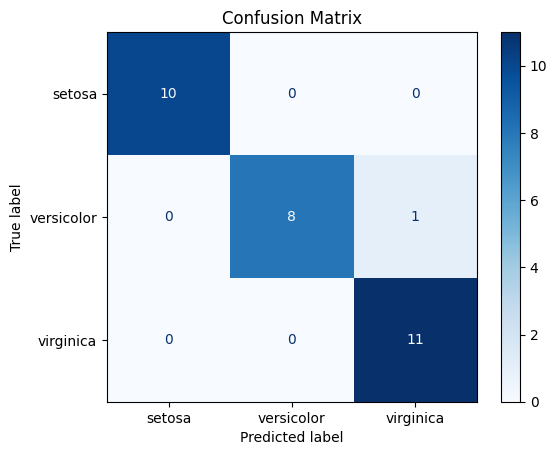

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Seaborn Visualization

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

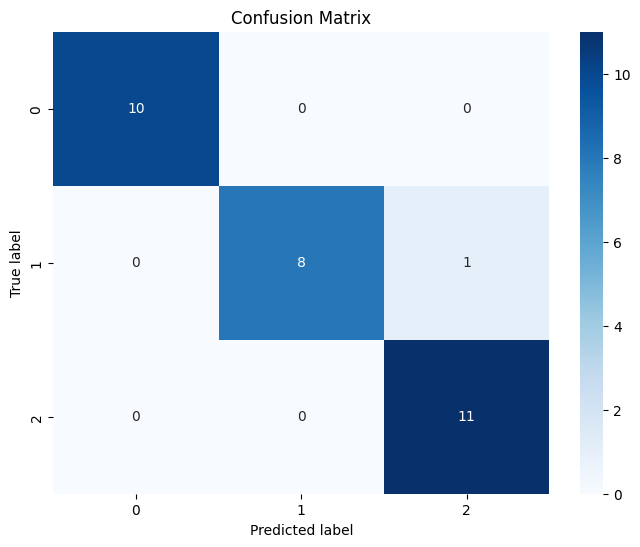

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
# Define a function to plot decision boundary
# def plot_decision_boundary(X, y, model):
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
#                          np.arange(y_min, y_max, 0.1))
#     Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)).detach().numpy()
#     Z = np.argmax(Z, axis=1)
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, alpha=0.4)
#     plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
#     plt.xlabel('Sepal Length')
#     plt.ylabel('Sepal Width')
#     plt.title('Decision Boundary')

# # Visualize decision boundary
# plt.figure(figsize=(8, 6))
# plot_decision_boundary(X_test, y_test, model)
# plt.show()

Predict For new Value

In [ ]:
# Define new input data (a single sample) for prediction
X_new = [[5.1, 3.5, 1.4, 0.2]]  # Example new input data

# Convert the new input data to a PyTorch tensor
X_new_tensor = torch.tensor(X_new, dtype=torch.float32)

# Set the model to evaluation mode
model.eval()

# Perform inference on the new input data
with torch.no_grad():
    outputs = model(X_new_tensor)
    _, predicted = torch.max(outputs, 1)

# Convert the predicted tensor to a numpy array
predicted = predicted.numpy()

# Print the predicted class label
print("Predicted class label for the new input:")
print(predicted)


Predicted class label for the new input:
[1]
